In [200]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch 
from scipy.cluster.hierarchy import dendrogram, cophenet, linkage, single
from scipy.spatial.distance import pdist
from scipy.stats import zscore
import seaborn as sns
import pickle

In [237]:
stud=pd.read_csv('student.csv')

In [238]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   rollno   20 non-null     int64
 1   maths    20 non-null     int64
 2   science  20 non-null     int64
dtypes: int64(3)
memory usage: 608.0 bytes


In [239]:
stud.head()

,rollno,maths,science
0,1,80,75
1,2,75,85
2,3,50,24
3,4,15,25
4,5,45,50


In [240]:
stud_no_roll=stud.drop('rollno', axis=1)

In [241]:
stud_no_roll.head()

,maths,science
0,80,75
1,75,85
2,50,24
3,15,25
4,45,50


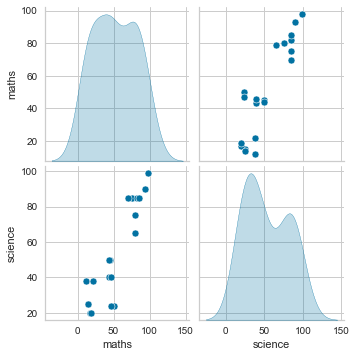

In [242]:
sns.pairplot(stud_no_roll, diag_kind="kde")

# KMeans

In [243]:
from scipy.spatial.distance import cdist
clusters=range(1,5)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(stud_no_roll)
    prediction=model.predict(stud_no_roll)
    print(prediction)
    meanDistortions.append(model.inertia_)#(sum(np.min(cdist(tech_sup,model.cluster_centers_))))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1]
[0 0 2 1 2 2 1 0 1 0 0 0 2 1 2 2 1 0 1 0]
[0 0 1 2 1 1 2 0 2 3 0 0 1 2 1 1 2 0 2 3]


In [244]:
model.labels_

array([0, 0, 1, 2, 1, 1, 2, 0, 2, 3, 0, 0, 1, 2, 1, 1, 2, 0, 2, 3])

In [245]:
model.cluster_centers_

array([[78.5       , 80.        ],
       [45.83333333, 38.        ],
       [16.5       , 27.66666667],
       [95.5       , 94.5       ]])

In [117]:
model.cluster_centers_[1]

array([38., 37.])

In [118]:
df_centre=pd.DataFrame(model.cluster_centers_)

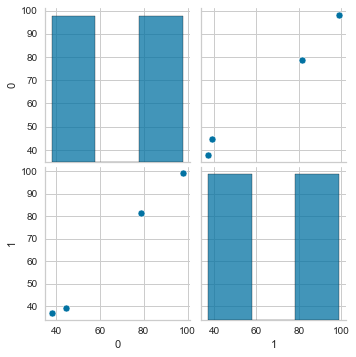

In [119]:
sns.pairplot(df_centre)

# Elbow

Text(0.5, 1.0, 'K with Elbow')

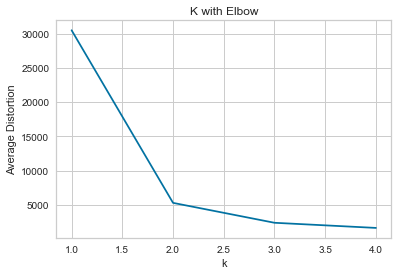

In [246]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('K with Elbow')

In [37]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: yellowbrick in c:\users\smita.ezhava\anaconda3\lib\site-packages (1.3.post1)



# Yellowbrick elbow

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

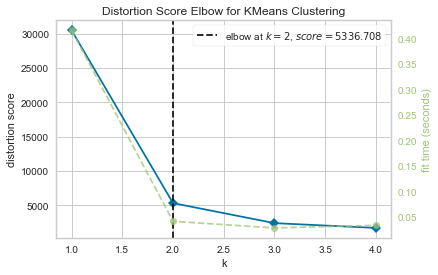

In [373]:
from yellowbrick.cluster import KElbowVisualizer
visual=KElbowVisualizer(KMeans(),k=(1,5))
visual.fit(stud_no_roll)
visual.show(outpath='elbowplot2.png') 

In [248]:
model1=KMeans(n_clusters=3)
model1.fit(stud_no_roll)
prediction1=model1.predict(stud_no_roll)
print(prediction1)

[1 1 0 2 0 0 2 1 2 1 1 1 0 2 0 0 2 1 2 1]


In [249]:
model1.labels_

array([1, 1, 0, 2, 0, 0, 2, 1, 2, 1, 1, 1, 0, 2, 0, 0, 2, 1, 2, 1])

In [250]:
stud_output=stud_no_roll
stud_output['group']=model1.labels_

In [251]:
stud_output.head(10)

,maths,science,group
0,80,75,1
1,75,85,1
2,50,24,0
3,15,25,2
4,45,50,0
5,43,40,0
6,17,20,2
7,82,85,1
8,12,38,2
9,98,99,1


In [252]:
colors = np.random.rand(10)

In [253]:
stud_no_roll['group'].to_numpy()

array([1, 1, 0, 2, 0, 0, 2, 1, 2, 1, 1, 1, 0, 2, 0, 0, 2, 1, 2, 1])

In [254]:
model1.cluster_centers_[1]

array([82.75 , 83.625])

In [255]:
stud_output[stud_output['group']==1]['science']

0     75
1     85
7     85
9     99
10    65
11    85
17    85
19    90
Name: science, dtype: int64

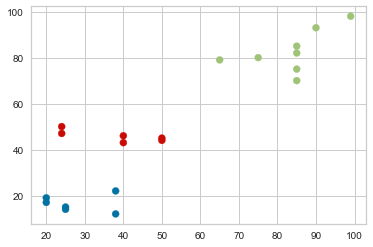

In [256]:
colormap = np.array(['r','g','b'])
plt.scatter(x=stud_output['science'], y=stud_output['maths'],c=colormap[stud_output['group'].to_numpy()])
#plt.scatter(x=stud_output[stud_output['group']==0]['science'], y=stud_output[stud_output['group']==0]['maths'], color='g')

# Persist Model

In [35]:
model_save=pickle.dumps(model1)

In [36]:
model_ret=pickle.loads(model_save)

In [85]:
a=np.array([[45,35]])

In [86]:
a

array([[45, 35]])

In [87]:
model_ret.predict(a)

array([0])

# Hierarchical

In [305]:
model_hier1=AgglomerativeClustering(n_clusters=4,linkage='complete', affinity='manhattan')

In [306]:
model_hier1.fit(stud_no_roll)

AgglomerativeClustering(affinity='manhattan', linkage='complete', n_clusters=4)

In [307]:
model_hier1.labels_

array([1, 1, 0, 2, 0, 0, 2, 1, 2, 3, 1, 1, 0, 2, 0, 0, 2, 1, 2, 3],
      dtype=int64)

In [308]:
z=linkage(stud_no_roll,'ward')

In [309]:
pdist(stud_no_roll)

array([ 11.18033989,  59.1776985 ,  82.01219422,  43.02324953,
        50.94114251,  83.6361166 ,  10.19803903,  77.4209274 ,
        30.        ,  10.04987562,  14.14213562,  60.75360072,
        82.80700453,  43.84062043,  48.80573737,  82.14012418,
        11.18033989,  68.80406965,  19.84943324,  65.93178293,
        84.85870609,  46.10856753,  55.22680509,  87.12060606,
         7.        ,  78.6066155 ,  26.92582404,  20.39607805,
         5.        ,  67.12674579,  85.56868586,  46.7653718 ,
        53.54437412,  85.80209788,  10.        ,  70.84490102,
        18.68154169,  35.07135583,  26.47640459,  17.4642492 ,
        33.30165161,  68.8912186 ,  40.54626987,  89.05054744,
        50.22947342,  64.20280368,   3.        ,  36.06937759,
        26.68332813,  16.4924225 ,  31.32091953,  70.33491309,
        31.36877428,  78.77816956,  39.10242959,  31.82766093,
         5.38516481,  89.94442729,  13.34166406, 111.20251796,
        75.47847375,  81.4002457 ,  32.07802986,   1.  

In [310]:
c, coph_dists=cophenet(z, pdist(stud_no_roll))

In [311]:
c

0.8861323846636763

In [312]:
coph_dists

array([ 24.61706725, 224.29909347, 224.29909347, 224.29909347,
       224.29909347, 224.29909347,  24.61706725, 224.29909347,
        38.70077519,  10.04987562,  24.61706725, 224.29909347,
       224.29909347, 224.29909347, 224.29909347, 224.29909347,
        24.61706725, 224.29909347,  38.70077519, 224.29909347,
       224.29909347, 224.29909347, 224.29909347, 224.29909347,
        15.55634919, 224.29909347,  38.70077519,  24.61706725,
         5.        , 224.29909347, 224.29909347, 224.29909347,
       224.29909347, 224.29909347,  15.55634919, 224.29909347,
        38.70077519,  76.33697226,  34.90940656,  34.90940656,
        76.33697226, 224.29909347,  76.33697226, 224.29909347,
       224.29909347, 224.29909347,   3.        ,  76.33697226,
        34.90940656,  34.90940656,  76.33697226, 224.29909347,
        76.33697226, 224.29909347,  76.33697226,  76.33697226,
         8.63133825, 224.29909347,  25.34100761, 224.29909347,
       224.29909347, 224.29909347,  76.33697226,   1.  

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [30.0, 30.0, 60.0, 60.0],
  [10.0, 10.0, 45.0, 45.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [125.0, 125.0, 135.0, 135.0],
  [100.0, 100.0, 130.0, 130.0],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [150.0, 150.0, 180.0, 180.0],
  [115.0, 115.0, 165.0, 165.0],
  [27.5, 27.5, 140.0, 140.0]],
 'dcoord': [[0.0, 10.295630140987, 10.295630140987, 0.0],
  [0.0, 10.04987562112089, 10.04987562112089, 0.0],
  [0.0, 3.0, 3.0, 0.0],
  [0.0, 5.0, 5.0, 0.0],
  [3.0, 15.556349186104045, 15.556349186104045, 5.0],
  [10.04987562112089,
   24.617067250182334,
   24.617067250182334,
   15.556349186104045],
  [10.295630140987, 38.70077518603471, 38.70077518603471, 24.617067250182334],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 2.0,

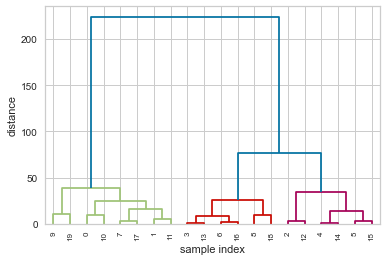

In [313]:
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(z, leaf_rotation=90., color_threshold=40, leaf_font_size=8.)

# DBSCAN

In [361]:
model_scan=DBSCAN(eps=15).fit(stud_no_roll)

In [362]:
model_scan.labels_

array([ 0,  0, -1,  1, -1, -1,  1,  0,  1, -1,  0,  0, -1,  1, -1, -1,  1,
        0,  1,  0], dtype=int64)

In [350]:
from sklearn.neighbors import NearestNeighbors

In [351]:
stud_no_rollgroup=stud_no_roll.drop(['group'],axis=1)

In [368]:
neigh = NearestNeighbors(radius=15)

In [369]:
nbrs=neigh.fit(stud_no_rollgroup)

In [370]:
distances, indices = nbrs.kneighbors(stud_no_rollgroup)

In [374]:
distances

array([ 1.        ,  1.        ,  1.        ,  1.        ,  2.        ,
        2.        ,  3.        ,  3.        ,  3.        ,  3.        ,
        3.        ,  3.        ,  5.        ,  5.        ,  9.43398113,
       10.        , 10.        , 10.04987562, 10.04987562, 10.29563014])

In [371]:
stud_no_rollgroup

,maths,science
0,80,75
1,75,85
2,50,24
3,15,25
4,45,50
5,43,40
6,17,20
7,82,85
8,12,38
9,98,99


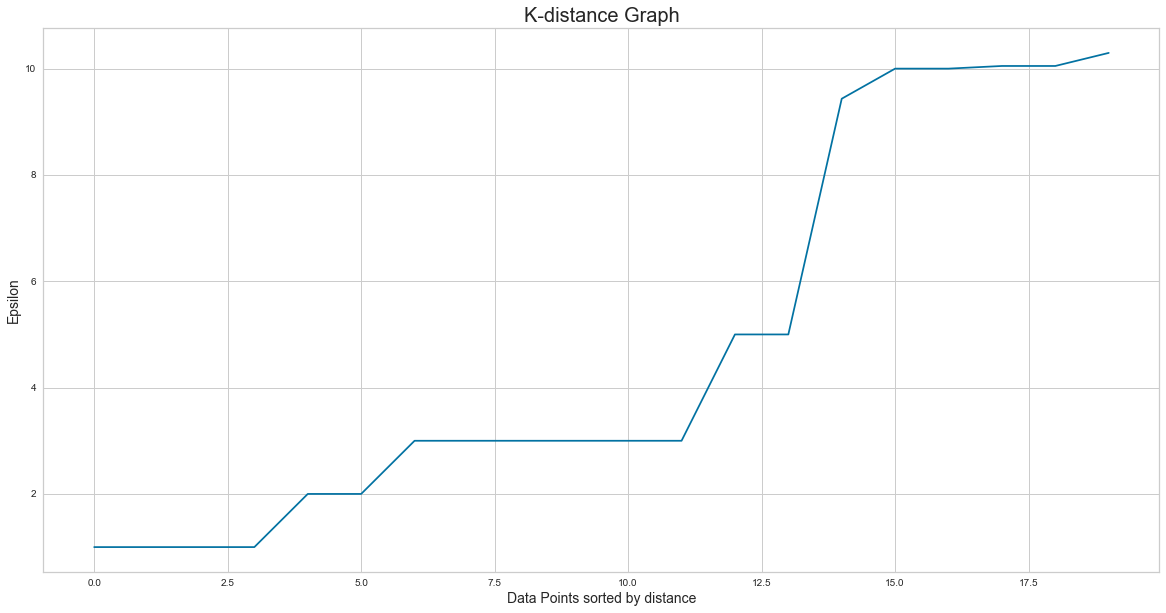

In [372]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()